In [11]:
import catboost
import pandas as pd
import csv
import numpy as np
from scipy import stats
import lightgbm as lgb
import xgboost as xgb
import catboost as ctb
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

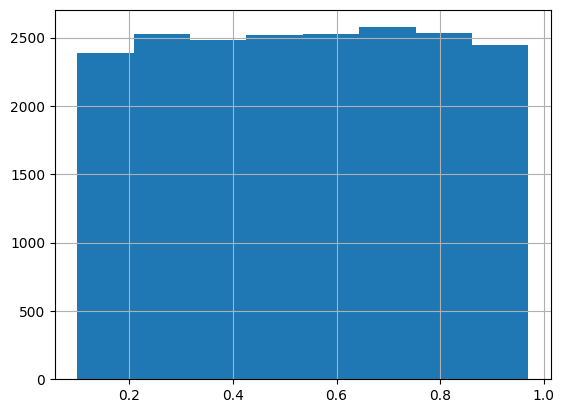

In [3]:
df = pd.read_csv("./data/value.csv", sep=";")
df.dtypes
nomCol = df.columns[5]
hist = df[nomCol].hist(bins=int(len(pd.unique(df[nomCol]))/10))


In [7]:
test = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df["Latence1"].min())

0.0590122753


<AxesSubplot: xlabel='Latence1'>

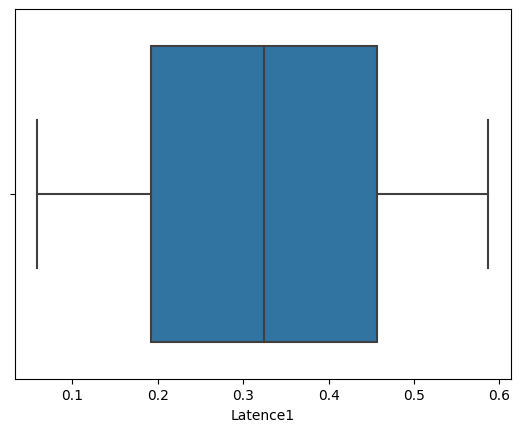

In [6]:
sns.boxplot(x=df["Latence1"])

In [8]:
y = df["Latence1"]
x = df[["CPU1", "RAM1"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
X_train

,CPU1,RAM1
17815,0.51,0.4
18370,0.46,0.5
1379,0.76,0.3
14763,0.35,0.7
7346,0.54,0.4
...,...,...
13123,0.80,0.5
19648,0.48,0.5
9845,0.58,0.4
10799,0.71,0.5


In [9]:
model = ctb.CatBoostRegressor(learning_rate=0.3, depth=11, loss_function='RMSE')

In [12]:
model.fit(X_train, y_train)

train_score = mean_squared_error(y_train, model.predict(X_train), squared=False)
test_score = mean_squared_error(y_test, model.predict(X_test), squared=False)

print("Train Score:", train_score)
print("Test Score:", test_score)

0:	learn: 0.1521741	total: 40.2ms	remaining: 3.18s
1:	learn: 0.1521013	total: 55ms	remaining: 2.14s
2:	learn: 0.1520764	total: 61.1ms	remaining: 1.57s
3:	learn: 0.1519641	total: 86.3ms	remaining: 1.64s
4:	learn: 0.1518802	total: 100ms	remaining: 1.51s
5:	learn: 0.1518683	total: 107ms	remaining: 1.31s
6:	learn: 0.1518594	total: 111ms	remaining: 1.15s
7:	learn: 0.1518287	total: 118ms	remaining: 1.06s
8:	learn: 0.1517969	total: 127ms	remaining: 1s
9:	learn: 0.1517717	total: 135ms	remaining: 943ms
10:	learn: 0.1517069	total: 157ms	remaining: 985ms
11:	learn: 0.1516652	total: 183ms	remaining: 1.04s
12:	learn: 0.1516618	total: 187ms	remaining: 965ms
13:	learn: 0.1516407	total: 196ms	remaining: 926ms
14:	learn: 0.1516006	total: 225ms	remaining: 975ms
15:	learn: 0.1515628	total: 253ms	remaining: 1.01s
16:	learn: 0.1515129	total: 282ms	remaining: 1.05s
17:	learn: 0.1515099	total: 288ms	remaining: 993ms
18:	learn: 0.1514974	total: 295ms	remaining: 946ms
19:	learn: 0.1514811	total: 301ms	remainin